In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, root_mean_squared_error, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from geopy.distance import geodesic

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import joblib as jb
import pickle as pk1

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("delivery_time.csv")

In [3]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [5]:
df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

# Data Cleaning

In [7]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [8]:
df[df["Delivery_person_Age"]=="NaN "]["Delivery_person_Age"]

42       NaN 
74       NaN 
120      NaN 
140      NaN 
179      NaN 
         ... 
45508    NaN 
45518    NaN 
45519    NaN 
45526    NaN 
45566    NaN 
Name: Delivery_person_Age, Length: 1854, dtype: object

In [9]:
df["Delivery_person_Age"].iloc[40:75]

40      22
41      35
42    NaN 
43      37
44      28
45      37
46      23
47      27
48      37
49      33
50      31
51      31
52      25
53      28
54      31
55      24
56      39
57      39
58      32
59      36
60      25
61      33
62      30
63      33
64      36
65      21
66      39
67      23
68      35
69      39
70      22
71      32
72      24
73      29
74    NaN 
Name: Delivery_person_Age, dtype: object

In [10]:
# Replace 'NaN' strings with actual np.nan

df = df.replace("NaN ",np.nan)

In [11]:
df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions                 0
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [12]:
# Replace NaN values in all column with 0
df = df.fillna(0)

In [13]:
df["Time_Orderd"].value_counts()

Time_Orderd
0           1731
21:55:00     461
17:55:00     456
20:00:00     449
22:20:00     448
            ... 
12:25:00      57
14:15:00      56
16:00:00      53
13:20:00      52
16:30:00      51
Name: count, Length: 177, dtype: int64

In [14]:
df.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [15]:
df["Delivery_person_Age"].iloc[40:75]

40    22
41    35
42     0
43    37
44    28
45    37
46    23
47    27
48    37
49    33
50    31
51    31
52    25
53    28
54    31
55    24
56    39
57    39
58    32
59    36
60    25
61    33
62    30
63    33
64    36
65    21
66    39
67    23
68    35
69    39
70    22
71    32
72    24
73    29
74     0
Name: Delivery_person_Age, dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [17]:
df.head(3)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26


In [18]:
# coverting datatype object to integer
df["Delivery_person_Age"] =  df["Delivery_person_Age"].astype(int)

In [19]:
# coverting datatype object to float

In [20]:
df["Delivery_person_Ratings"] = df["Delivery_person_Ratings"].astype(float)

In [21]:
df["Delivery_person_Ratings"] = df["Delivery_person_Ratings"].astype(int)

In [22]:
df["multiple_deliveries"] =  df["multiple_deliveries"].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  int64  
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [24]:
# converting object datatype into date datatype

In [25]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           45593 non-null  object        
 1   Delivery_person_ID           45593 non-null  object        
 2   Delivery_person_Age          45593 non-null  int64         
 3   Delivery_person_Ratings      45593 non-null  int64         
 4   Restaurant_latitude          45593 non-null  float64       
 5   Restaurant_longitude         45593 non-null  float64       
 6   Delivery_location_latitude   45593 non-null  float64       
 7   Delivery_location_longitude  45593 non-null  float64       
 8   Order_Date                   45593 non-null  datetime64[ns]
 9   Time_Orderd                  45593 non-null  object        
 10  Time_Order_picked            45593 non-null  object        
 11  Weatherconditions            45593 non-nu

In [27]:
df.head(4)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21


In [28]:
# removing the rows who has "0" in time orderd column

In [29]:
df = df[df["Time_Orderd"]!=0]

In [30]:
# converting object datatype into datetime datatype

In [31]:
df["Time_Orderd"] = pd.to_datetime(df["Time_Orderd"].astype(str).str.strip(),errors="coerce")

In [32]:
df["Time_Order_picked"] = pd.to_datetime(df["Time_Order_picked"].astype(str).str.strip(),errors="coerce")

In [33]:
df.head(4).iloc[:,8:14]

,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition
0,2022-03-19,2025-02-24 11:30:00,2025-02-24 11:45:00,conditions Sunny,High,2
1,2022-03-25,2025-02-24 19:45:00,2025-02-24 19:50:00,conditions Stormy,Jam,2
2,2022-03-19,2025-02-24 08:30:00,2025-02-24 08:45:00,conditions Sandstorms,Low,0
3,2022-04-05,2025-02-24 18:00:00,2025-02-24 18:10:00,conditions Sunny,Medium,0


In [34]:
df["time_diff"] = df["Time_Order_picked"] - df["Time_Orderd"]

In [35]:
df["time_diff"] 

0         0 days 00:15:00
1         0 days 00:05:00
2         0 days 00:15:00
3         0 days 00:10:00
4         0 days 00:15:00
               ...       
45588     0 days 00:10:00
45589     0 days 00:15:00
45590   -1 days +00:15:00
45591     0 days 00:05:00
45592     0 days 00:05:00
Name: time_diff, Length: 43862, dtype: timedelta64[ns]

In [36]:
df["time_diff_min"] = df["time_diff"].dt.total_seconds() / 60 
df["time_diff_min"]

0          15.0
1           5.0
2          15.0
3          10.0
4          15.0
          ...  
45588      10.0
45589      15.0
45590   -1425.0
45591       5.0
45592       5.0
Name: time_diff_min, Length: 43862, dtype: float64

In [37]:
df["time_diff_min"] = df["time_diff_min"].replace(-1425.0,20.0)
df["time_diff_min"] = df["time_diff_min"].replace(-1430.0,15.0)
df["time_diff_min"] = df["time_diff_min"].replace(-1435.0,10.0)

In [38]:
df["time_diff_min"] = df["time_diff_min"].astype(int)

In [39]:
df.drop("time_diff",axis=1,inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43862 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           43862 non-null  object        
 1   Delivery_person_ID           43862 non-null  object        
 2   Delivery_person_Age          43862 non-null  int64         
 3   Delivery_person_Ratings      43862 non-null  int64         
 4   Restaurant_latitude          43862 non-null  float64       
 5   Restaurant_longitude         43862 non-null  float64       
 6   Delivery_location_latitude   43862 non-null  float64       
 7   Delivery_location_longitude  43862 non-null  float64       
 8   Order_Date                   43862 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  datetime64[ns]
 10  Time_Order_picked            43862 non-null  datetime64[ns]
 11  Weatherconditions            43862 non-null  o

In [41]:
df.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),time_diff_min
0,0x4607,INDORES13DEL02,37,4,22.745049,75.892471,22.765049,75.912471,2022-03-19,2025-02-24 11:30:00,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,15
1,0xb379,BANGRES18DEL02,34,4,12.913041,77.683237,13.043041,77.813237,2022-03-25,2025-02-24 19:45:00,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,5


In [42]:
# Extract only the numeric value from 'delivery_time' column (by using regex)
df['Time_taken(min)'] = df['Time_taken(min)'].str.extract('(\d+)')

In [43]:
# Convert the column to integer type
df['Time_taken(min)'] = df['Time_taken(min)'].astype(int)

In [44]:
df[df["Festival"]==0]["Festival"]

1401     0
1415     0
1586     0
1623     0
1708     0
        ..
44888    0
44965    0
45127    0
45155    0
45173    0
Name: Festival, Length: 219, dtype: object

In [45]:
# replacing "NO" at the place of 0 in festival column

In [46]:
df["Festival"] = df["Festival"].replace(0,"No")

In [47]:
df[df["Festival"]=="No"]["Festival"].shape

(219,)

In [48]:
df.shape

(43862, 21)

In [49]:
df["City"].value_counts()

City
Metropolitian     32802
Urban              9760
0                  1144
Semi-Urban          156
Name: count, dtype: int64

In [50]:
# replace 0 into rular in city column

In [51]:
df["City"] = df["City"].replace(0,"rural")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43862 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           43862 non-null  object        
 1   Delivery_person_ID           43862 non-null  object        
 2   Delivery_person_Age          43862 non-null  int64         
 3   Delivery_person_Ratings      43862 non-null  int64         
 4   Restaurant_latitude          43862 non-null  float64       
 5   Restaurant_longitude         43862 non-null  float64       
 6   Delivery_location_latitude   43862 non-null  float64       
 7   Delivery_location_longitude  43862 non-null  float64       
 8   Order_Date                   43862 non-null  datetime64[ns]
 9   Time_Orderd                  43862 non-null  datetime64[ns]
 10  Time_Order_picked            43862 non-null  datetime64[ns]
 11  Weatherconditions            43862 non-null  o

In [53]:
# saperate the year , month and day from ordar date column 

In [54]:
df["order_year"] = df["Order_Date"].dt.year
df["order_month"] = df["Order_Date"].dt.month
df["order_day"] = df["Order_Date"].dt.day

In [55]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)',
       'time_diff_min', 'order_year', 'order_month', 'order_day'],
      dtype='object')

In [56]:
df = df[['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date','order_year', 'order_month', 'order_day','Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City','time_diff_min', 'Time_taken(min)']]

In [57]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,order_year,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,time_diff_min,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4,22.745049,75.892471,22.765049,75.912471,2022-03-19,2022,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,15,24
1,0xb379,BANGRES18DEL02,34,4,12.913041,77.683237,13.043041,77.813237,2022-03-25,2022,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,5,33
2,0x5d6d,BANGRES19DEL01,23,4,12.914264,77.678400,12.924264,77.688400,2022-03-19,2022,...,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,15,26
3,0x7a6a,COIMBRES13DEL02,38,4,11.003669,76.976494,11.053669,77.026494,2022-04-05,2022,...,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,10,21
4,0x70a2,CHENRES12DEL01,32,4,12.972793,80.249982,13.012793,80.289982,2022-03-26,2022,...,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,15,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4,26.902328,75.794257,26.912328,75.804257,2022-03-24,2022,...,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,10,32
45589,0xd641,AGRRES16DEL01,21,4,0.000000,0.000000,0.070000,0.070000,2022-02-16,2022,...,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,15,36
45590,0x4f8d,CHENRES08DEL03,30,4,13.022394,80.242439,13.052394,80.272439,2022-03-11,2022,...,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,20,16
45591,0x5eee,COIMBRES11DEL01,20,4,11.001753,76.986241,11.041753,77.026241,2022-03-07,2022,...,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,5,26


In [58]:
# coverting negative values of "Restaurant_latitude" column in +ve 
# because of this negative values distance will increase a lot , it can be go above 2000 km
df["Restaurant_latitude"] = df["Restaurant_latitude"].abs().sort_values(ascending=True)

In [59]:
# find out Haversine distance in km by using latitude and longitude of restaurant and delivery lication  

In [60]:
from math import radians,sqrt,sin,cos,atan2

In [61]:
def distance_km(lat1,lon1,lat2,lon2):
    lat1 = lat1*(3.14/180)
    lon1 = lon1*(3.14/180)
    lat2 = lat2*(3.14/180)
    lon2 = lon2*(3.14/180)
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    r = 6371 # radius of earth
    a = sin(dlat/2)**2+cos(lat1)*cos(lat2)*sin(dlon/2)**2
    e = 2*atan2(sqrt(a),sqrt(1-a))
    d = r*e
    return d

In [62]:
df["distance_km"] = df.apply(lambda x : distance_km(x["Restaurant_latitude"],x["Restaurant_longitude"],
                         x["Delivery_location_latitude"],x["Delivery_location_longitude"]),axis=1)

In [63]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'order_year',
       'order_month', 'order_day', 'Time_Orderd', 'Time_Order_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City', 'time_diff_min', 'Time_taken(min)', 'distance_km'],
      dtype='object')

In [64]:
df.columns = ['Order_ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'order_year',
       'order_month', 'order_day', 'Time_Orderd', 'Time_Order_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City','time_diff_min', 'Time_taken(min)', 'distance_km']

In [65]:
df = df[['Order_ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude','distance_km', 'Order_Date', 'order_year',
       'order_month', 'order_day', 'Time_Orderd', 'Time_Order_picked',
       'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival',
       'City','time_diff_min', 'Time_taken(min)']]

In [66]:
df

,Order_ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,distance_km,Order_Date,...,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,time_diff_min,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4,22.745049,75.892471,22.765049,75.912471,3.023733,2022-03-19,...,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,15,24
1,0xb379,BANGRES18DEL02,34,4,12.913041,77.683237,13.043041,77.813237,20.173558,2022-03-25,...,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,5,33
2,0x5d6d,BANGRES19DEL01,23,4,12.914264,77.678400,12.924264,77.688400,1.551990,2022-03-19,...,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,15,26
3,0x7a6a,COIMBRES13DEL02,38,4,11.003669,76.976494,11.053669,77.026494,7.786525,2022-04-05,...,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,10,21
4,0x70a2,CHENRES12DEL01,32,4,12.972793,80.249982,13.012793,80.289982,6.207070,2022-03-26,...,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,15,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4,26.902328,75.794257,26.912328,75.804257,1.489170,2022-03-24,...,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,10,32
45589,0xd641,AGRRES16DEL01,21,4,0.000000,0.000000,0.070000,0.070000,11.002154,2022-02-16,...,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,15,36
45590,0x4f8d,CHENRES08DEL03,30,4,13.022394,80.242439,13.052394,80.272439,4.654895,2022-03-11,...,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,20,16
45591,0x5eee,COIMBRES11DEL01,20,4,11.001753,76.986241,11.041753,77.026241,6.229292,2022-03-07,...,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,5,26


In [67]:
# replaced o to mean of "delivery person age" in "delivery person age" column

In [68]:
df["Delivery_person_Age"] = df["Delivery_person_Age"].replace(0,df["Delivery_person_Age"].mean().round().astype(int))

In [69]:
# replaced o to mean of "Delivery_person_Ratings" in "Delivery_person_Ratings" column

In [70]:
df["Delivery_person_Ratings"].mean()

np.float64(4.034038575532351)

In [71]:
df["Delivery_person_Ratings"] = df["Delivery_person_Ratings"].replace(0,4)

In [72]:
# replaced o to Medium  of "Road_traffic_density" in "Road_traffic_density" column

In [73]:
df["Road_traffic_density"] = df["Road_traffic_density"].replace(0,"Medium ")

# Data Analysis

In [74]:
# create age group of range(20-29) = young , range(30 to 39) mid age 
# max age =39, min age =20

In [75]:
df["age_group"] = pd.cut(df["Delivery_person_Age"],bins=2,labels=["young","mid_age"] )

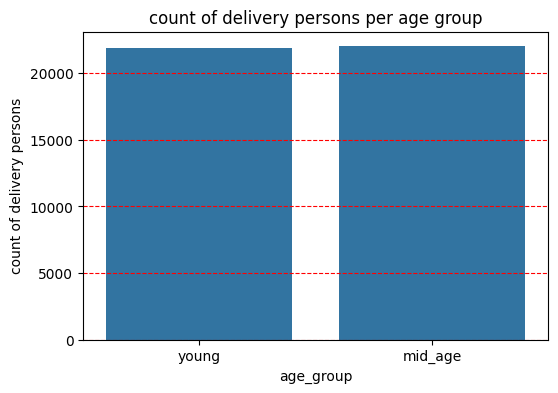

In [76]:
# count plot
plt.figure(figsize=(6,4))
sns.countplot(df,x="age_group")
plt.yticks(range(0,25000,5000))
plt.ylabel("count of delivery persons")
plt.title("count of delivery persons per age group")
plt.grid(ls="--",axis="y",c="red")
plt.show()

In [77]:
df["age_group"].value_counts()

age_group
mid_age    22013
young      21849
Name: count, dtype: int64

In [78]:
avg_ratings = df.groupby("age_group")["Delivery_person_Ratings"].mean().values.astype(int)

In [79]:
age_group = df.groupby("age_group")["Delivery_person_Ratings"].mean().index

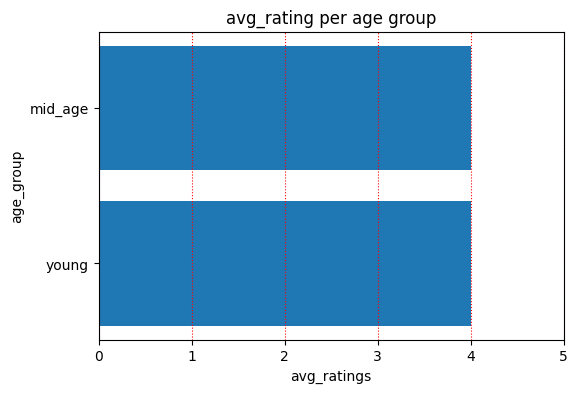

In [80]:
# bar graph
plt.figure(figsize=(6,4))
plt.barh(age_group,avg_ratings)
plt.xticks(range(0,6,1))
plt.grid(axis="x",ls=":",c="red")
plt.xlabel("avg_ratings")
plt.ylabel("age_group")
plt.title("avg_rating per age group")
plt.show()

In [81]:
df.groupby("age_group")["Delivery_person_Ratings"].mean().astype(int)

age_group
young      4
mid_age    4
Name: Delivery_person_Ratings, dtype: int64

In [82]:
df["distance_km"] = df["distance_km"].astype(int)

In [83]:
df["distance_type"] = pd.cut(df["distance_km"],bins=3,labels=["close","moderate","far"])

In [84]:
df["distance_type"].value_counts().values

array([19721, 15092,  9049])

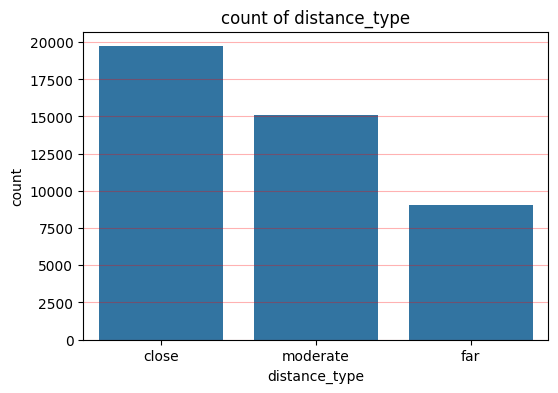

In [85]:
plt.figure(figsize=(6,4))
sns.countplot(df,x="distance_type")
plt.grid(ls="-",axis="y",c="red",alpha=0.3)
plt.title("count of distance_type")
plt.show()

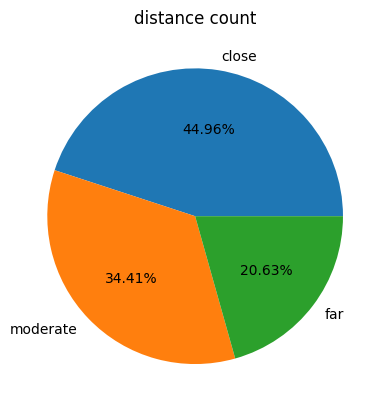

In [86]:
plt.pie(df["distance_type"].value_counts().values,labels=df["distance_type"].value_counts().index,autopct="%.2f%%")
plt.title("distance count")
plt.show()

In [87]:
average_delivery_time = df.groupby("distance_type")["Time_taken(min)"].mean().astype(int)
average_delivery_time

distance_type
close       23
moderate    28
far         29
Name: Time_taken(min), dtype: int64

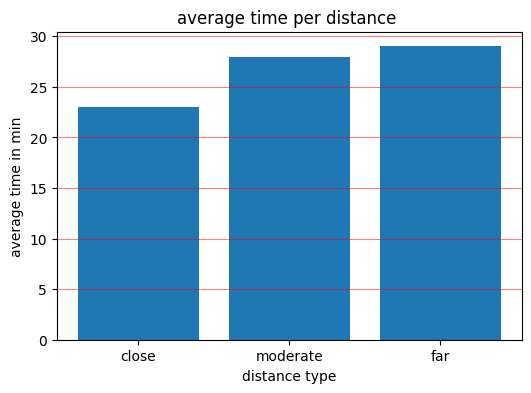

In [88]:
plt.figure(figsize=(6,4))
plt.bar(average_delivery_time.index,average_delivery_time.values)
plt.xlabel("distance type")
plt.ylabel("average time in min")
plt.title("average time per distance ")
plt.grid(ls="-",axis="y",alpha=0.5,c="red")
plt.show()

In [89]:
average_delivery_distance = df.groupby("distance_type")["distance_km"].mean().astype(int)
average_delivery_distance

distance_type
close        4
moderate    10
far         17
Name: distance_km, dtype: int64

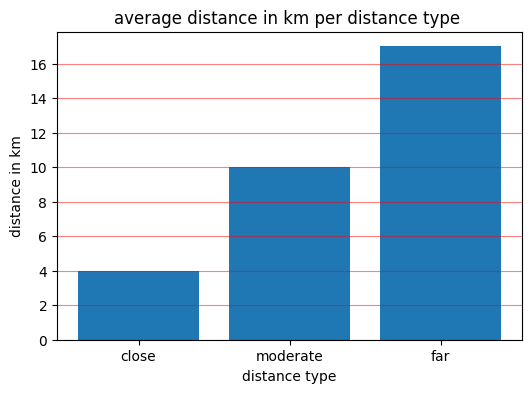

In [90]:
plt.figure(figsize=(6,4))
plt.bar(average_delivery_distance.index,average_delivery_distance.values)
plt.xlabel("distance type")
plt.ylabel("distance in km")
plt.title("average distance in km per distance type ")
plt.grid(ls="-",axis="y",alpha=0.5,c="red")
plt.show()

In [91]:
print("min = " ,df["distance_km"].min())
print("max = " ,df["distance_km"].max())
print("mean = " ,df["distance_km"].mean())

min =  1
max =  20
mean =  9.256486252336876


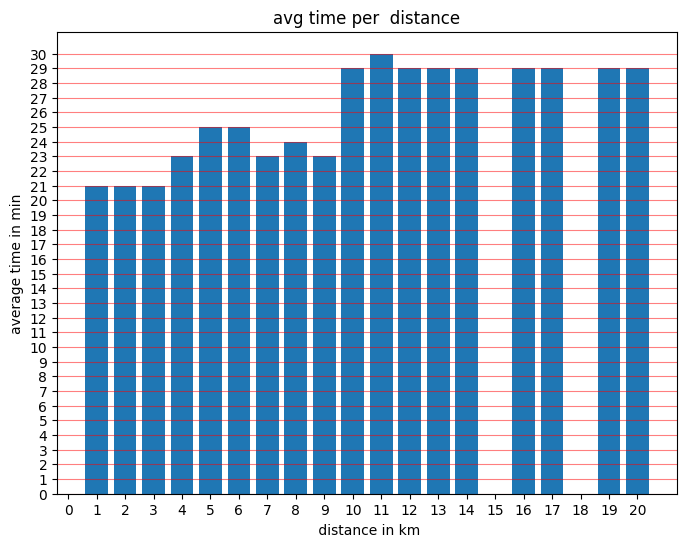

In [92]:
plt.figure(figsize=(8,6))
plt.bar(df.groupby("distance_km")["Time_taken(min)"].mean().index,df.groupby("distance_km")["Time_taken(min)"].mean().astype(int).values)
plt.ylabel("average time in min")
plt.xlabel(" distance in km")
plt.title("avg time per  distance")
plt.yticks(range(0,31,1))
plt.xticks(range(0,21,1))
plt.grid(ls="-",axis="y",alpha=0.5,c="red")
plt.show()

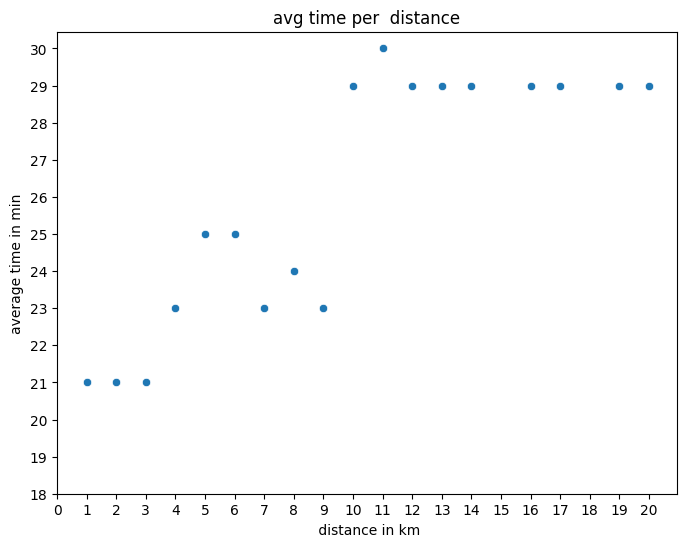

In [93]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.groupby("distance_km")["Time_taken(min)"].mean().index,y=df.groupby("distance_km")["Time_taken(min)"].mean().astype(int).values)
plt.ylabel("average time in min")
plt.xlabel(" distance in km")
plt.title("avg time per  distance")
plt.yticks(range(18,31,1))
plt.xticks(range(0,21,1))
plt.show()

In [94]:
df["order_year"].value_counts()

order_year
2022    43862
Name: count, dtype: int64

In [95]:
df["order_month"].value_counts(ascending=False)

order_month
3    30766
2     6970
4     6126
Name: count, dtype: int64

# count plot

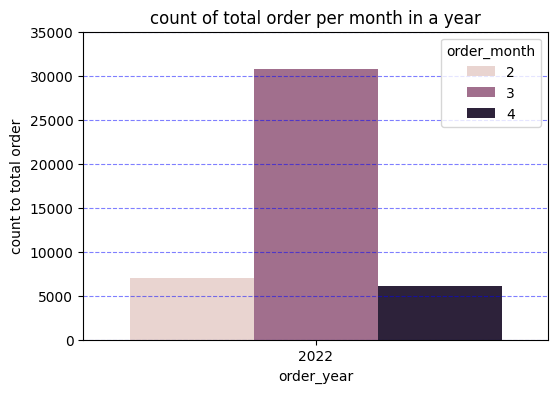

In [96]:
plt.figure(figsize=(6,4))
sns.countplot(df,x=df["order_year"],hue="order_month",alpha=1)
plt.title("count of total order per month in a year")
plt.ylabel("count to total order")
plt.grid(ls="--",axis="y",c="blue",alpha=0.5)
plt.yticks(range(0,36000,5000))
plt.show()

In [97]:
df.groupby("order_month")["Festival"].value_counts()

order_month  Festival
2            No           6797
             Yes           142
             No             31
3            No          30008
             Yes           606
             No            152
4            No           5981
             Yes           109
             No             36
Name: count, dtype: int64

In [98]:
# here we replace "No " to "No" in festival column

In [99]:
df["Festival"] = df["Festival"].replace("No ","No")

In [100]:
# here we replace "Yes " to "Yes" in festival column

In [101]:
df["Festival"] = df["Festival"].replace("Yes ","Yes")

In [102]:
df["Festival"].value_counts()

Festival
No     43005
Yes      857
Name: count, dtype: int64

In [103]:
df.groupby("order_month")["Festival"].value_counts()

order_month  Festival
2            No           6828
             Yes           142
3            No          30160
             Yes           606
4            No           6017
             Yes           109
Name: count, dtype: int64

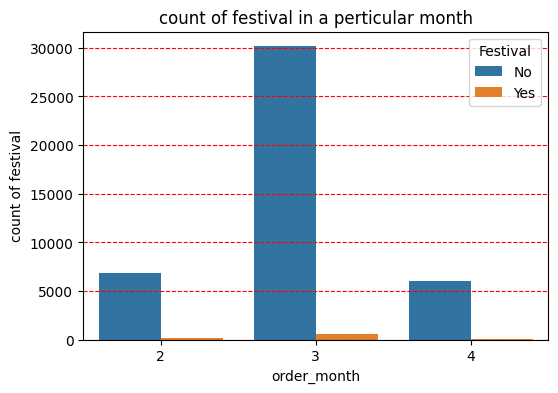

In [104]:
plt.figure(figsize=(6,4))
sns.countplot(df,x="order_month",hue="Festival",alpha=1)
plt.ylabel("count of festival")
plt.grid(ls="--",axis="y",c="red",alpha=1)
plt.title("count of festival in a perticular month")
plt.show()

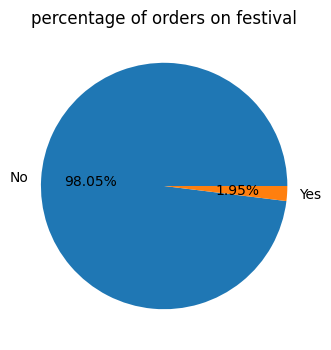

In [105]:
plt.figure(figsize=(6,4))
plt.pie(df["Festival"].value_counts().values,labels = df["Festival"].value_counts().index,autopct="%.2f%%")
plt.title("percentage of orders on festival")
plt.show()

In [106]:
df

,Order_ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,distance_km,Order_Date,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,time_diff_min,Time_taken(min),age_group,distance_type
0,0x4607,INDORES13DEL02,37,4,22.745049,75.892471,22.765049,75.912471,3,2022-03-19,...,2,Snack,motorcycle,0,No,Urban,15,24,mid_age,close
1,0xb379,BANGRES18DEL02,34,4,12.913041,77.683237,13.043041,77.813237,20,2022-03-25,...,2,Snack,scooter,1,No,Metropolitian,5,33,mid_age,far
2,0x5d6d,BANGRES19DEL01,23,4,12.914264,77.678400,12.924264,77.688400,1,2022-03-19,...,0,Drinks,motorcycle,1,No,Urban,15,26,young,close
3,0x7a6a,COIMBRES13DEL02,38,4,11.003669,76.976494,11.053669,77.026494,7,2022-04-05,...,0,Buffet,motorcycle,1,No,Metropolitian,10,21,mid_age,close
4,0x70a2,CHENRES12DEL01,32,4,12.972793,80.249982,13.012793,80.289982,6,2022-03-26,...,1,Snack,scooter,1,No,Metropolitian,15,30,mid_age,close
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4,26.902328,75.794257,26.912328,75.804257,1,2022-03-24,...,1,Meal,motorcycle,0,No,Metropolitian,10,32,mid_age,close
45589,0xd641,AGRRES16DEL01,21,4,0.000000,0.000000,0.070000,0.070000,11,2022-02-16,...,0,Buffet,motorcycle,1,No,Metropolitian,15,36,young,moderate
45590,0x4f8d,CHENRES08DEL03,30,4,13.022394,80.242439,13.052394,80.272439,4,2022-03-11,...,1,Drinks,scooter,0,No,Metropolitian,20,16,mid_age,close
45591,0x5eee,COIMBRES11DEL01,20,4,11.001753,76.986241,11.041753,77.026241,6,2022-03-07,...,0,Snack,motorcycle,1,No,Metropolitian,5,26,young,close


In [107]:
df["Time_Orderd"].value_counts(ascending=False)

Time_Orderd
2025-02-24 21:55:00    461
2025-02-24 17:55:00    456
2025-02-24 20:00:00    449
2025-02-24 22:20:00    448
2025-02-24 21:35:00    446
                      ... 
2025-02-24 12:25:00     57
2025-02-24 14:15:00     56
2025-02-24 16:00:00     53
2025-02-24 13:20:00     52
2025-02-24 16:30:00     51
Name: count, Length: 176, dtype: int64

In [108]:
df["Time_Orderd"].max()

Timestamp('2025-02-24 23:55:00')

In [109]:
df["Time_Orderd"].min()

Timestamp('2025-02-24 00:00:00')

In [110]:
df["Time_Orderd_hour"] = df["Time_Orderd"].apply(lambda x : x.hour)


In [111]:
df["Time_Orderd_minute"] = df["Time_Orderd"].apply(lambda x : x.minute)


In [112]:
df["Order_picked_hour"] = df["Time_Order_picked"].apply(lambda x : x.hour)

In [113]:
df["Order_picked_minute"] = df["Time_Order_picked"].apply(lambda x : x.minute)

In [114]:
df[["Time_Orderd_hour","Time_Orderd"]]

,Time_Orderd_hour,Time_Orderd
0,11,2025-02-24 11:30:00
1,19,2025-02-24 19:45:00
2,8,2025-02-24 08:30:00
3,18,2025-02-24 18:00:00
4,13,2025-02-24 13:30:00
...,...,...
45588,11,2025-02-24 11:35:00
45589,19,2025-02-24 19:55:00
45590,23,2025-02-24 23:50:00
45591,13,2025-02-24 13:35:00


In [115]:
print(df.dtypes)

Order_ID                               object
Delivery_person_ID                     object
Delivery_person_Age                     int64
Delivery_person_Ratings                 int64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
distance_km                             int64
Order_Date                     datetime64[ns]
order_year                              int32
order_month                             int32
order_day                               int32
Time_Orderd                    datetime64[ns]
Time_Order_picked              datetime64[ns]
Weatherconditions                      object
Road_traffic_density                   object
Vehicle_condition                       int64
Type_of_order                          object
Type_of_vehicle                        object
multiple_deliveries                     int64
Festival                          

In [116]:
df["time_of_day"]= pd.cut(df["Time_Orderd_hour"],bins=5,labels=["early_morning","late_morning","afternoon","evening","night"])

In [117]:
df["time_of_day"].value_counts()

time_of_day
night            22907
evening          11131
afternoon         5629
late_morning      3765
early_morning      430
Name: count, dtype: int64

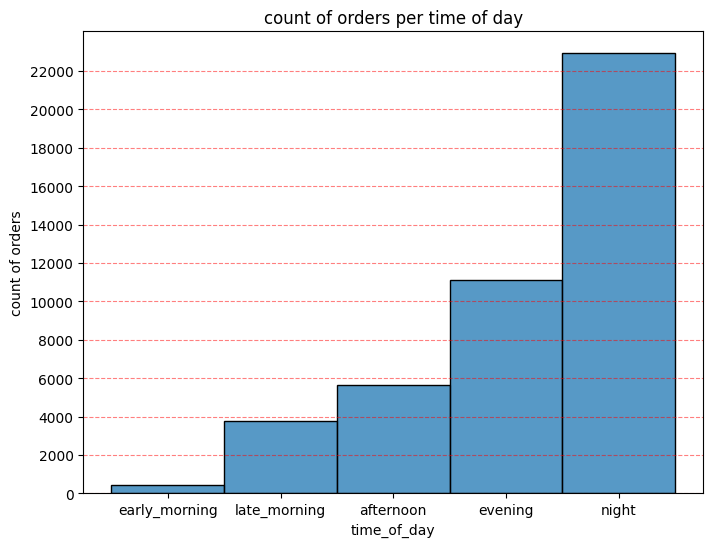

In [118]:
plt.figure(figsize=(8,6))
sns.histplot(df,x="time_of_day")
plt.yticks(range(0,23000,2000))
plt.ylabel("count of orders")
plt.title("count of orders per time of day")
plt.grid(ls="--",axis="y",c="red",alpha=0.5)
plt.show()

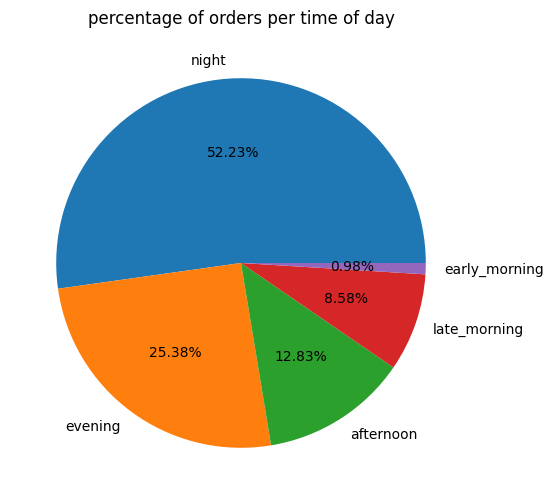

In [119]:
plt.figure(figsize=(8,6))
plt.pie(df["time_of_day"].value_counts().values,labels = df["time_of_day"].value_counts().index,autopct="%.2f%%")
plt.title("percentage of orders per time of day")
plt.show()

In [120]:
print(df.dtypes)

Order_ID                               object
Delivery_person_ID                     object
Delivery_person_Age                     int64
Delivery_person_Ratings                 int64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
distance_km                             int64
Order_Date                     datetime64[ns]
order_year                              int32
order_month                             int32
order_day                               int32
Time_Orderd                    datetime64[ns]
Time_Order_picked              datetime64[ns]
Weatherconditions                      object
Road_traffic_density                   object
Vehicle_condition                       int64
Type_of_order                          object
Type_of_vehicle                        object
multiple_deliveries                     int64
Festival                          

In [121]:
df.groupby("time_of_day")["Road_traffic_density"].value_counts()

time_of_day    Road_traffic_density
early_morning  Low                       430
               High                        0
               Jam                         0
               Medium                      0
late_morning   Low                      3765
               High                        0
               Jam                         0
               Medium                      0
afternoon      High                     3445
               Low                      2184
               Jam                         0
               Medium                      0
evening        Medium                  10254
               High                      877
               Jam                         0
               Low                         0
night          Jam                     13800
               Low                      8683
               Medium                    424
               High                        0
Name: count, dtype: int64

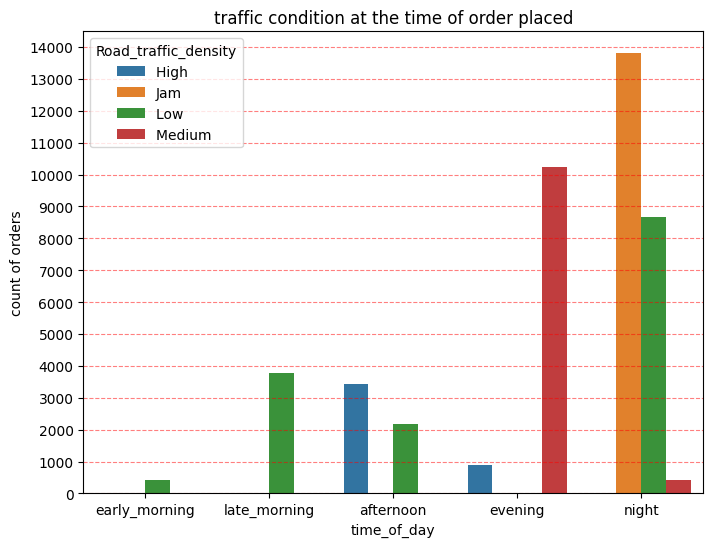

In [122]:
plt.figure(figsize=(8,6))
sns.countplot(df,x="time_of_day",hue="Road_traffic_density",alpha=1)
plt.yticks(range(0,15000,1000))
plt.ylabel("count of orders")
plt.title("traffic condition at the time of order placed")
plt.grid(ls="--",axis="y",c="red",alpha=0.5)
plt.show()

In [123]:
df["Vehicle_condition"].value_counts()

Vehicle_condition
2    14642
1    14617
0    14603
Name: count, dtype: int64

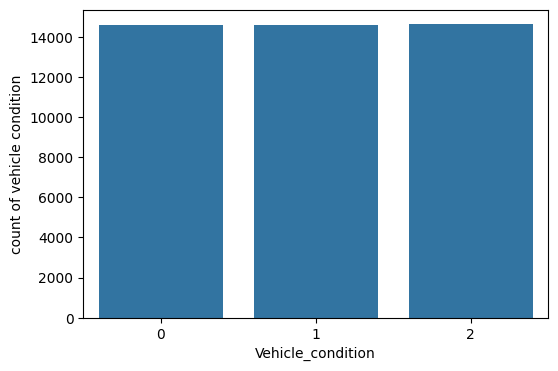

In [124]:
plt.figure(figsize=(6,4))
sns.countplot(df,x="Vehicle_condition",alpha=1)
plt.ylabel("count of vehicle condition")
plt.show()

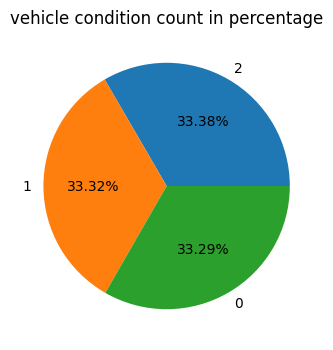

In [125]:
plt.figure(figsize=(6,4))
plt.pie(df["Vehicle_condition"].value_counts().values,labels=df["Vehicle_condition"].value_counts().index,autopct="%.2f%%")
plt.title("vehicle condition count in percentage")
plt.show()

In [126]:
df["Type_of_order"].value_counts()

Type_of_order
Snack      11091
Meal       11018
Drinks     10897
Buffet     10856
Name: count, dtype: int64

In [127]:
df["City"].value_counts()

City
Metropolitian     32802
Urban              9760
rural              1144
Semi-Urban          156
Name: count, dtype: int64

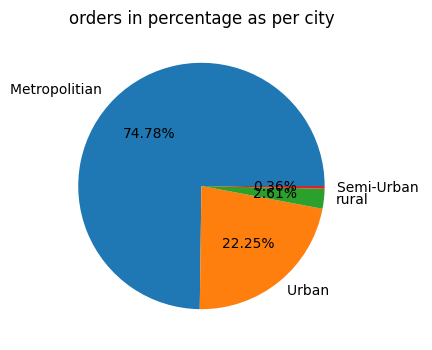

In [128]:
plt.figure(figsize=(6,4))
plt.pie(df["City"].value_counts().values,labels=df["City"].value_counts().index,autopct="%.2f%%")
plt.title("orders in percentage as per city")
plt.show()

In [129]:
df["time_of_day"].value_counts()

time_of_day
night            22907
evening          11131
afternoon         5629
late_morning      3765
early_morning      430
Name: count, dtype: int64

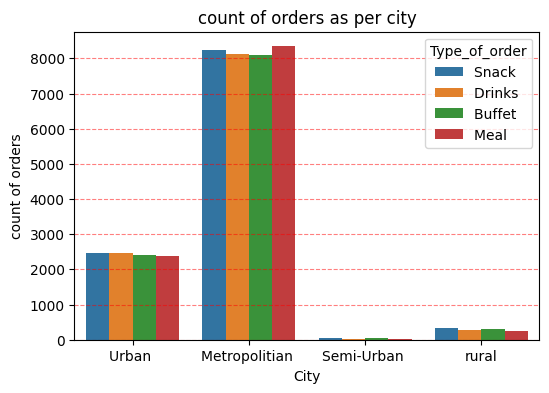

In [130]:
plt.figure(figsize=(6,4))
sns.countplot(df,x="City",hue="Type_of_order",alpha=1)
plt.title("count of orders as per city")
plt.ylabel("count of orders")
plt.grid(ls="--",alpha=0.5,axis="y",c="red")
plt.show()

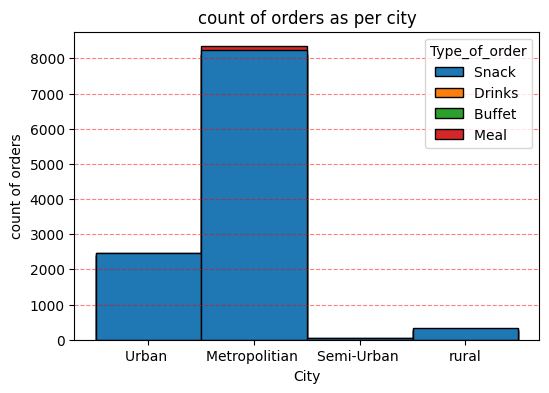

In [131]:
plt.figure(figsize=(6,4))
sns.histplot(df,x="City",hue="Type_of_order",alpha=1)
plt.title("count of orders as per city")
plt.ylabel("count of orders")
plt.grid(ls="--",alpha=0.5,axis="y",c="red")
plt.show()

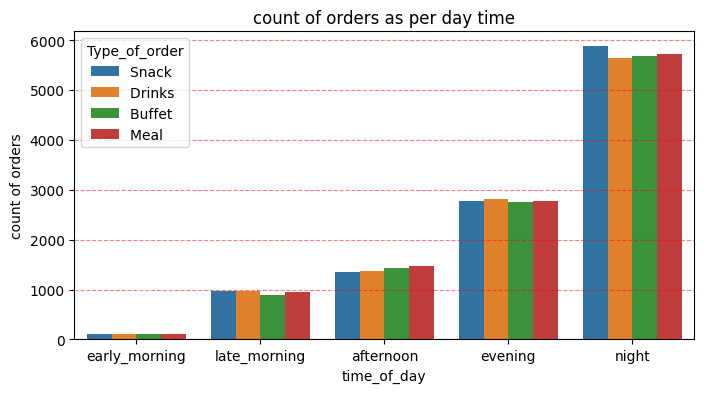

In [132]:
plt.figure(figsize=(8,4))
sns.countplot(df,x="time_of_day",hue="Type_of_order",alpha=1)
plt.title("count of orders as per day time")
plt.ylabel("count of orders")
plt.grid(ls="--",alpha=0.5,axis="y",c="red")
plt.show()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43862 entries, 0 to 45592
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Order_ID                     43862 non-null  object        
 1   Delivery_person_ID           43862 non-null  object        
 2   Delivery_person_Age          43862 non-null  int64         
 3   Delivery_person_Ratings      43862 non-null  int64         
 4   Restaurant_latitude          43862 non-null  float64       
 5   Restaurant_longitude         43862 non-null  float64       
 6   Delivery_location_latitude   43862 non-null  float64       
 7   Delivery_location_longitude  43862 non-null  float64       
 8   distance_km                  43862 non-null  int64         
 9   Order_Date                   43862 non-null  datetime64[ns]
 10  order_year                   43862 non-null  int32         
 11  order_month                  43862 non-null  i

In [134]:
df["Road_traffic_density"].value_counts()

Road_traffic_density
Low        15062
Jam        13800
Medium     10678
High        4322
Name: count, dtype: int64

In [135]:
df["distance_km"].value_counts()

distance_km
7     3993
1     3964
4     3895
10    3638
9     3429
3     3426
12    3420
6     3416
13    3253
16    2486
19    2384
20    2044
17    1462
11     847
14     673
2      517
5      510
8      505
Name: count, dtype: int64

In [136]:
df["distance_type"].value_counts()

distance_type
close       19721
moderate    15092
far          9049
Name: count, dtype: int64

In [137]:
traffic_condition = df.groupby("Road_traffic_density")["Time_taken(min)"].mean()

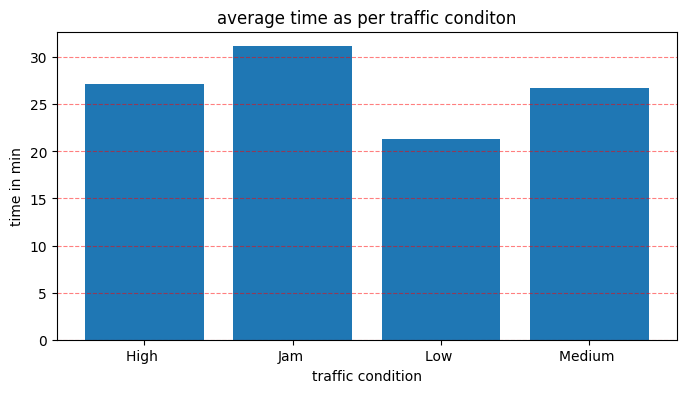

In [138]:
plt.figure(figsize=(8,4))
plt.bar(traffic_condition.index,traffic_condition.values)
plt.title("average time as per traffic conditon")
plt.ylabel("time in min")
plt.xlabel("traffic condition")
plt.grid(ls="--",alpha=0.5,axis="y",c="red")
plt.show()

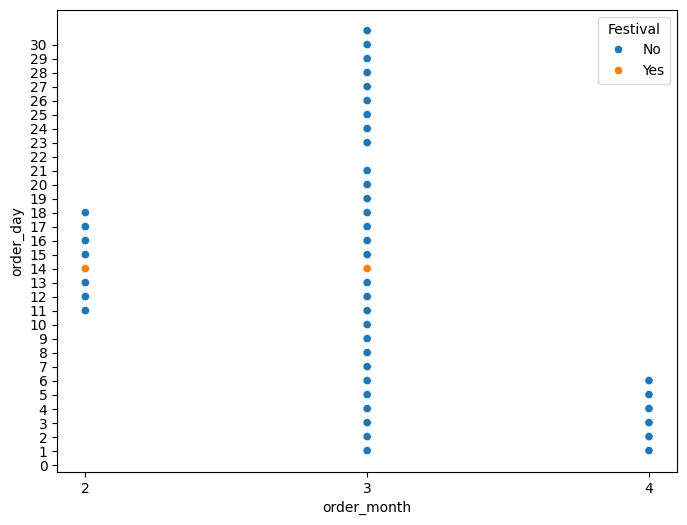

In [139]:
plt.figure(figsize=(8,6))
sns.scatterplot(df,x="order_month",y="order_day",hue="Festival")
plt.yticks(range(0,31,1))
plt.xticks(range(2,5,1))
plt.show()

# removing unwanted columns

In [140]:
df[df["time_diff_min"].abs()>20]

,Order_ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,distance_km,Order_Date,...,City,time_diff_min,Time_taken(min),age_group,distance_type,Time_Orderd_hour,Time_Orderd_minute,Order_picked_hour,Order_picked_minute,time_of_day


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43862 entries, 0 to 45592
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Order_ID                     43862 non-null  object        
 1   Delivery_person_ID           43862 non-null  object        
 2   Delivery_person_Age          43862 non-null  int64         
 3   Delivery_person_Ratings      43862 non-null  int64         
 4   Restaurant_latitude          43862 non-null  float64       
 5   Restaurant_longitude         43862 non-null  float64       
 6   Delivery_location_latitude   43862 non-null  float64       
 7   Delivery_location_longitude  43862 non-null  float64       
 8   distance_km                  43862 non-null  int64         
 9   Order_Date                   43862 non-null  datetime64[ns]
 10  order_year                   43862 non-null  int32         
 11  order_month                  43862 non-null  i

In [142]:
df.drop(["Order_ID","Delivery_person_ID","Restaurant_latitude",
       "Restaurant_longitude", "Delivery_location_latitude",
       "Delivery_location_longitude","Order_Date","Time_Orderd","Time_Order_picked","age_group","distance_type","Time_Orderd_hour",
         "Time_Orderd_minute","Order_picked_hour","Order_picked_minute","time_of_day"],axis=1,inplace=True) 

In [143]:
df.head(2)

,Delivery_person_Age,Delivery_person_Ratings,distance_km,order_year,order_month,order_day,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,time_diff_min,Time_taken(min)
0,37,4,3,2022,3,19,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,15,24
1,34,4,20,2022,3,25,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,5,33


In [144]:
x = df.drop("Time_taken(min)",axis=1)
y = df["Time_taken(min)"]

In [145]:
x.shape

(43862, 15)

In [146]:
y.shape

(43862,)

In [147]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,distance_km,order_year,order_month,order_day,Vehicle_condition,multiple_deliveries,time_diff_min,Time_taken(min)
count,43862.00000,43862.000000,43862.000000,43862.0,43862.000000,43862.000000,43862.000000,43862.000000,43862.000000,43862.000000
mean,29.55230,4.058479,9.256486,2022.0,2.980758,13.813346,1.000889,0.728125,10.084127,26.293831
std,5.74754,0.353501,5.568439,0.0,0.546085,8.712109,0.816557,0.576571,4.184178,9.373765
min,20.00000,2.000000,1.000000,2022.0,2.000000,1.000000,0.000000,0.000000,5.000000,10.000000
25%,25.00000,4.000000,4.000000,2022.0,3.000000,6.000000,0.000000,0.000000,5.000000,19.000000
50%,30.00000,4.000000,9.000000,2022.0,3.000000,13.000000,1.000000,1.000000,10.000000,26.000000
75%,35.00000,4.000000,13.000000,2022.0,3.000000,20.000000,2.000000,1.000000,15.000000,32.000000
max,39.00000,5.000000,20.000000,2022.0,4.000000,31.000000,2.000000,3.000000,20.000000,54.000000


In [148]:
num_cols = df.describe().columns
num_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'distance_km',
       'order_year', 'order_month', 'order_day', 'Vehicle_condition',
       'multiple_deliveries', 'time_diff_min', 'Time_taken(min)'],
      dtype='object')

In [149]:
cat_cols = [i for i in df.columns if i not in num_cols]

In [150]:
cat_cols

['Weatherconditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

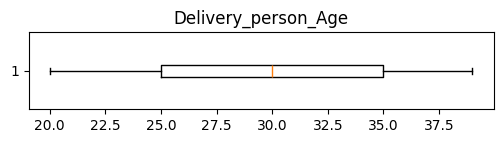

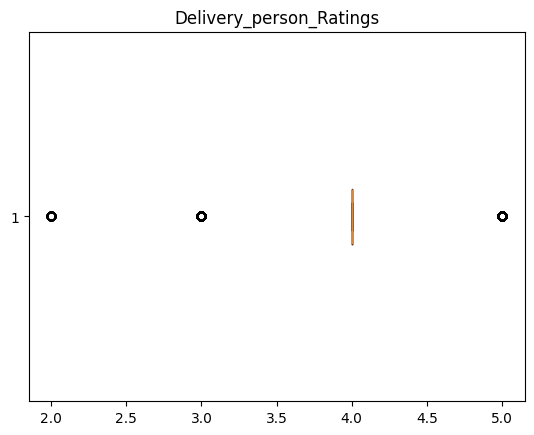

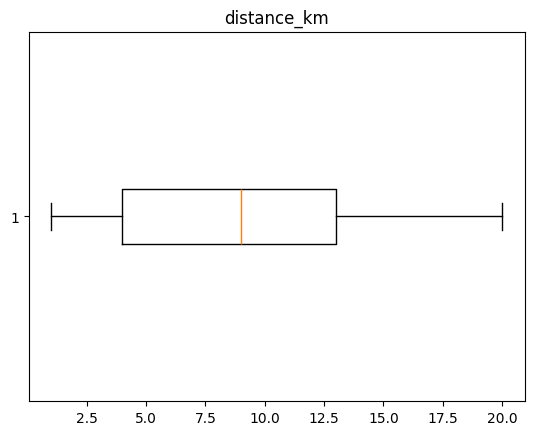

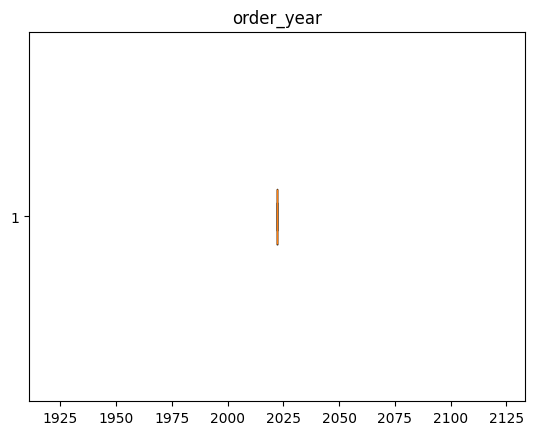

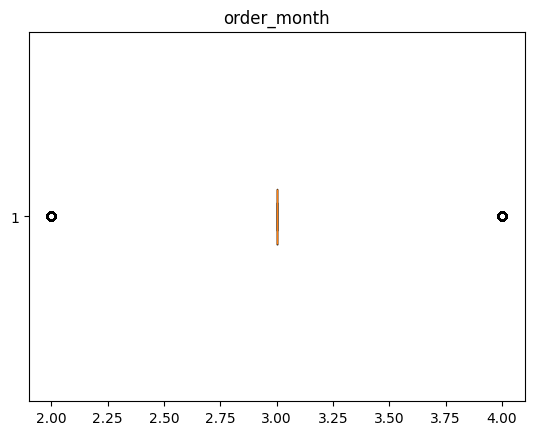

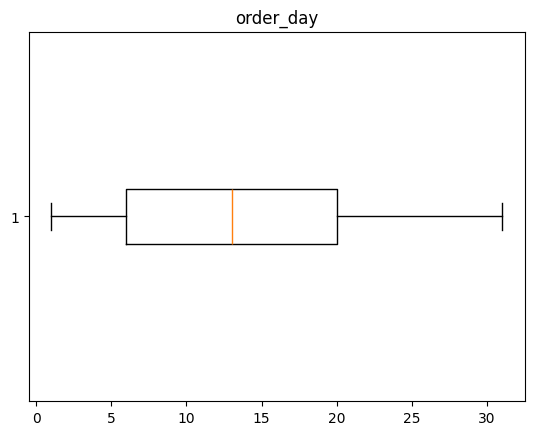

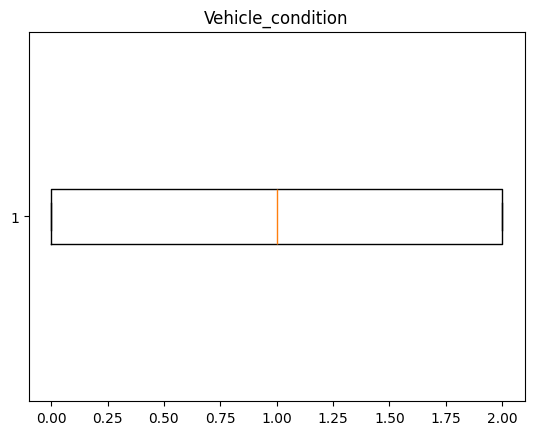

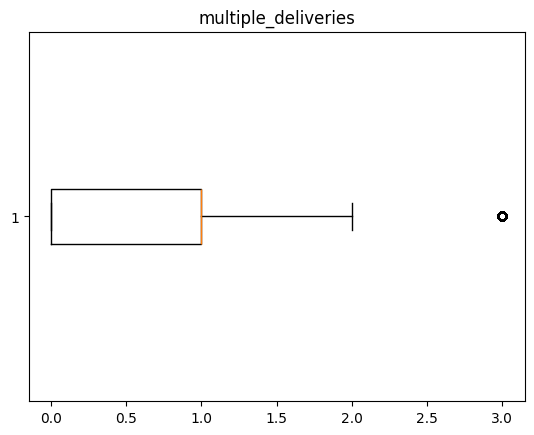

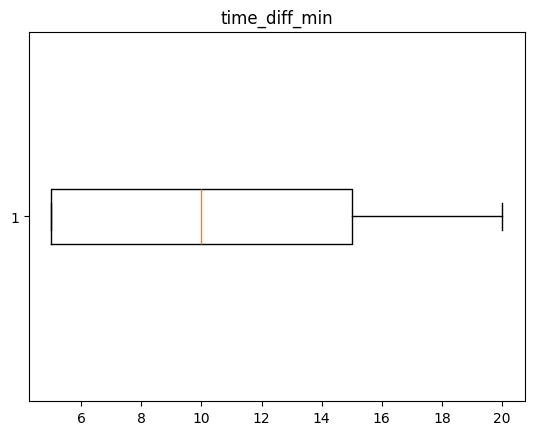

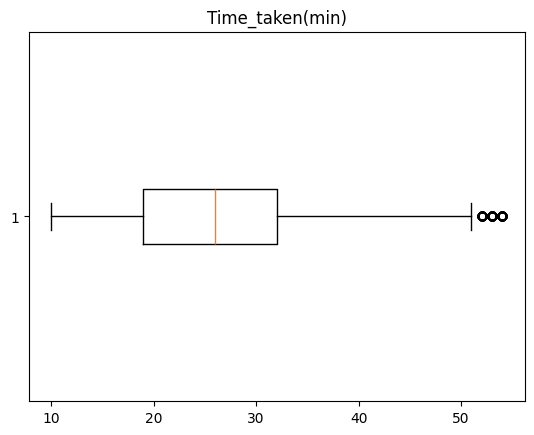

In [151]:
plt.figure(figsize=(6,1))

for i in num_cols:
    plt.boxplot(df[i],vert=False)
    plt.title(i)
    plt.show()

In [152]:
df["Delivery_person_Ratings"].mean().astype(int)

np.int64(4)

In [153]:
def outliers(column):
    mean=column.mean().astype(int)
    q1,q3=column.quantile([0.25,0.75])
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    return lower,upper,mean

In [154]:
l,u,x_bar = outliers(df['Delivery_person_Ratings'])
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].apply(lambda x: x_bar if x  < l or x > u else x)

In [155]:
l,u,x_bar = outliers(df['Delivery_person_Ratings'])
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].apply(lambda x: x_bar if x  < l or x > u else x)

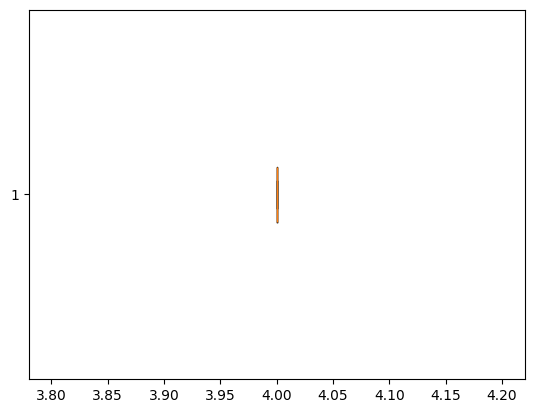

In [156]:
plt.boxplot(df["Delivery_person_Ratings"],vert=False)
plt.show()

In [157]:
time_per_multiple_deliveries = df.groupby("multiple_deliveries")["Time_taken(min)"].mean()

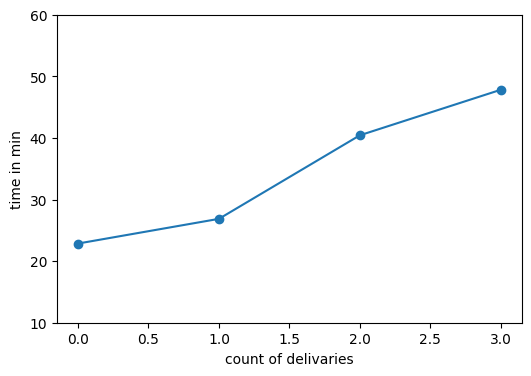

In [158]:
plt.figure(figsize=(6,4))
plt.plot(time_per_multiple_deliveries.index,time_per_multiple_deliveries.values,marker="o")
plt.yticks(range(10,61,10))
plt.xlabel("count of delivaries")
plt.ylabel("time in min")
plt.show()

In [159]:
num_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'distance_km',
       'order_year', 'order_month', 'order_day', 'Vehicle_condition',
       'multiple_deliveries', 'time_diff_min', 'Time_taken(min)'],
      dtype='object')

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43862 entries, 0 to 45592
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Delivery_person_Age      43862 non-null  int64 
 1   Delivery_person_Ratings  43862 non-null  int64 
 2   distance_km              43862 non-null  int64 
 3   order_year               43862 non-null  int32 
 4   order_month              43862 non-null  int32 
 5   order_day                43862 non-null  int32 
 6   Weatherconditions        43862 non-null  object
 7   Road_traffic_density     43862 non-null  object
 8   Vehicle_condition        43862 non-null  int64 
 9   Type_of_order            43862 non-null  object
 10  Type_of_vehicle          43862 non-null  object
 11  multiple_deliveries      43862 non-null  int64 
 12  Festival                 43862 non-null  object
 13  City                     43862 non-null  object
 14  time_diff_min            43862 non-null  in

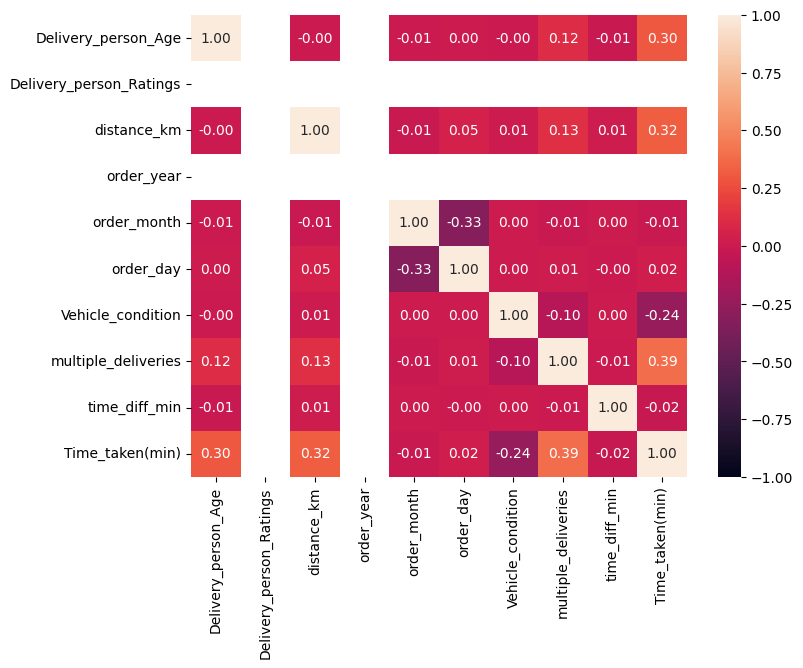

In [161]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(),vmin=-1,vmax=1,annot=True,fmt='.2f',cbar=True)
plt.show()

In [162]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [163]:
num_cols

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'distance_km',
       'order_year', 'order_month', 'order_day', 'Vehicle_condition',
       'multiple_deliveries', 'time_diff_min', 'Time_taken(min)'],
      dtype='object')

In [164]:
df = df.reset_index(drop=True)

# Data transformation

# standard scaler

In [165]:
scaler = StandardScaler()

In [166]:
scaler.fit(x[num_cols[:-1]])

StandardScaler()

In [167]:
x[num_cols[:-1]]=scaler.transform(x[num_cols[:-1]])

In [168]:
x

,Delivery_person_Age,Delivery_person_Ratings,distance_km,order_year,order_month,order_day,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,time_diff_min
0,1.295821,-0.16543,-1.123575,0.0,0.035237,0.595345,conditions Sunny,High,1.223580,Snack,motorcycle,-1.262868,No,Urban,1.174885
1,0.773853,-0.16543,1.929380,0.0,0.035237,1.284050,conditions Stormy,Jam,1.223580,Snack,scooter,0.471544,No,Metropolitian,-1.215098
2,-1.140031,-0.16543,-1.482746,0.0,0.035237,0.595345,conditions Sandstorms,Low,-1.225758,Drinks,motorcycle,0.471544,No,Urban,1.174885
3,1.469811,-0.16543,-0.405232,0.0,1.866473,-1.011632,conditions Sunny,Medium,-1.225758,Buffet,motorcycle,0.471544,No,Metropolitian,-0.020106
4,0.425874,-0.16543,-0.584818,0.0,0.035237,1.398834,conditions Cloudy,High,-0.001089,Snack,scooter,0.471544,No,Metropolitian,1.174885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0.077895,-0.16543,-1.482746,0.0,0.035237,1.169266,conditions Windy,High,-0.001089,Meal,motorcycle,-1.262868,No,Metropolitian,-0.020106
45589,-1.488010,-0.16543,0.313110,0.0,-1.795999,0.250993,conditions Windy,Jam,-1.225758,Buffet,motorcycle,0.471544,No,Metropolitian,1.174885
45590,0.077895,-0.16543,-0.943989,0.0,0.035237,-0.322927,conditions Cloudy,Low,-0.001089,Drinks,scooter,-1.262868,No,Metropolitian,2.369877
45591,-1.662000,-0.16543,-0.584818,0.0,0.035237,-0.782064,conditions Cloudy,High,-1.225758,Snack,motorcycle,0.471544,No,Metropolitian,-1.215098


# one-hot encoder

In [169]:
ohe = OneHotEncoder()

In [170]:
encoded = ohe.fit_transform(x[cat_cols])

In [171]:
x[ohe.get_feature_names_out()] = encoded.toarray()

In [172]:
x.drop(cat_cols,axis=1,inplace=True)

In [173]:
x.shape

(43862, 32)

# label encoder

In [174]:
le = LabelEncoder()

In [175]:
y = le.fit_transform(y)

In [176]:
y

array([14, 23, 16, ...,  6, 16, 26])

In [177]:
x

,Delivery_person_Age,Delivery_person_Ratings,distance_km,order_year,order_month,order_day,Vehicle_condition,multiple_deliveries,time_diff_min,Weatherconditions_conditions Cloudy,...,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,Festival_No,Festival_Yes,City_Metropolitian,City_Semi-Urban,City_Urban,City_rural
0,1.295821,-0.16543,-1.123575,0.0,0.035237,0.595345,1.223580,-1.262868,1.174885,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.773853,-0.16543,1.929380,0.0,0.035237,1.284050,1.223580,0.471544,-1.215098,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,-1.140031,-0.16543,-1.482746,0.0,0.035237,0.595345,-1.225758,0.471544,1.174885,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.469811,-0.16543,-0.405232,0.0,1.866473,-1.011632,-1.225758,0.471544,-0.020106,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.425874,-0.16543,-0.584818,0.0,0.035237,1.398834,-0.001089,0.471544,1.174885,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0.077895,-0.16543,-1.482746,0.0,0.035237,1.169266,-0.001089,-1.262868,-0.020106,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
45589,-1.488010,-0.16543,0.313110,0.0,-1.795999,0.250993,-1.225758,0.471544,1.174885,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
45590,0.077895,-0.16543,-0.943989,0.0,0.035237,-0.322927,-0.001089,-1.262868,2.369877,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
45591,-1.662000,-0.16543,-0.584818,0.0,0.035237,-0.782064,-1.225758,0.471544,-1.215098,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [178]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,train_size=0.7,random_state=1000)

# LinearRegression

In [179]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error,r2_score

In [180]:
linear_regression = LinearRegression()

In [181]:
linear_regression.fit(x_tr,y_tr)

LinearRegression()

In [182]:
linear_regression.score(x_tr,y_tr)

0.5518675816779777

In [183]:
lr_pred = linear_regression.predict(x_te)

In [184]:
# function for adjusted r2 

In [185]:
def adj_r2(y_test,y_pred,n,p):
    r2 = r2_score(y_test,y_pred)
    return 1-(((1-r2)*(n-1))/(n-p-1))
    

In [186]:
n,p = x_te.shape

In [187]:
lr_mse = mean_squared_error(y_te,lr_pred)
lr_rmse = root_mean_squared_error(y_te,lr_pred)
lr_r2 = r2_score(y_te,lr_pred)
lr_adj_r2 = adj_r2(y_te,lr_pred,n,p)

print("lr_mse =" ,lr_mse)
print("lr_rmse =" ,lr_rmse )
print("lr_r2 =" ,lr_r2)
print("lr_adj_r2 =" ,lr_adj_r2)

lr_mse = 39.31196993923994
lr_rmse = 6.2699258320366065
lr_r2 = 0.5535030933478322
lr_adj_r2 = 0.5524145743006839


In [188]:
# # by using datetime module we can find out current time and date 
# # from datetime import datetime
# # extract datetime of now
# datetime.now()

# # Extract time only
# cnow.time()

# # Extract date only
# now.date()


# random forest

In [189]:
from sklearn.ensemble import RandomForestRegressor


In [190]:
random_forest = RandomForestRegressor(n_estimators=200,max_depth=10,n_jobs=-1,random_state=100)

In [191]:
random_forest.fit(x_tr,y_tr)

RandomForestRegressor(max_depth=10, n_estimators=200, n_jobs=-1,
                      random_state=100)

In [192]:
random_forest.score(x_tr,y_tr)

0.8349829591106547

In [193]:
random_forest_pred = random_forest.predict(x_te)

In [194]:
rf_mse = mean_squared_error(y_te,random_forest_pred)
rf_rmse = root_mean_squared_error(y_te,random_forest_pred)
rf_r2 = r2_score(y_te,random_forest_pred)
rf_adj_r2 = adj_r2(y_te,random_forest_pred,n,p)

print("rf_mse =" ,rf_mse)
print("rf_rmse =" ,rf_rmse )
print("rf_r2 =" ,rf_r2)
print("rf_adj_r2 =" ,rf_adj_r2)

rf_mse = 16.165795844264576
rf_rmse = 4.020671068896904
rf_r2 = 0.8163923647380018
rf_adj_r2 = 0.8159447459410809


In [195]:
from sklearn.model_selection import RandomizedSearchCV

In [196]:
# params = {"n_estimators":[100,200,300],
#           "max_features":[10,15],
#           "max_depth":[7,10],
#           "criterion":['squared_error', 'absolute_error']
#           }

# rscv = RandomizedSearchCV( estimator=RandomForestRegressor(),
#                           param_distributions=params, cv=3,verbose=True,scoring="accuracy",error_score='raise')

# rscv.fit(x_tr,y_tr)

# adaboost

In [197]:
from sklearn.ensemble import AdaBoostRegressor

In [198]:
adaboost = AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=10),
                             n_estimators=50,random_state=100)

In [199]:
adaboost.fit(x_tr,y_tr)

AdaBoostRegressor(estimator=RandomForestRegressor(max_depth=10),
                  random_state=100)

In [200]:
adaboost.score(x_tr,y_tr)

0.8463783915748075

In [201]:
adaboost_pred = adaboost.predict(x_te)

In [202]:
adaboost_mse = mean_squared_error(y_te,adaboost_pred)
adaboost_rmse = root_mean_squared_error(y_te,adaboost_pred)
adaboost_r2 = r2_score(y_te,adaboost_pred)
adaboost_adj_r2 = adj_r2(y_te,adaboost_pred,n,p)

print("adaboost_mse =" ,adaboost_mse)
print("adaboost_rmse =" ,adaboost_rmse )
print("adaboost_r2 =" ,adaboost_r2)
print("adaboost_adj_r2 =" ,adaboost_adj_r2)

adaboost_mse = 15.713853469492657
adaboost_rmse = 3.964070315911747
adaboost_r2 = 0.8215254291108273
adaboost_adj_r2 = 0.8210903242602671


# stacking

In [203]:
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [204]:
base_model = [("dt",RandomForestRegressor(max_depth=6)),
              ("SVR",SVR(kernel="linear")),
              ("knr",KNeighborsRegressor(n_neighbors=9))]

In [205]:
final_model = AdaBoostRegressor()

In [206]:
stacking = StackingRegressor(estimators=base_model,final_estimator=final_model,
                             cv=3, n_jobs=-1,verbose=True,) 

In [207]:
stacking.fit(x_tr,y_tr)

StackingRegressor(cv=3,
                  estimators=[('dt', RandomForestRegressor(max_depth=6)),
                              ('SVR', SVR(kernel='linear')),
                              ('knr', KNeighborsRegressor(n_neighbors=9))],
                  final_estimator=AdaBoostRegressor(), n_jobs=-1, verbose=True)

In [208]:
stacking.score(x_tr,y_tr)

0.7135971338759559

In [209]:
stacking_pred = stacking.predict(x_te)

In [210]:
stacking_mse = mean_squared_error(y_te,stacking_pred)
stacking_rmse = root_mean_squared_error(y_te,stacking_pred)
stacking_r2 = r2_score(y_te,stacking_pred)
stacking_adj_r2 = adj_r2(y_te,stacking_pred,n,p)

print("stacking_mse =" ,stacking_mse)
print("stacking_rmse =" ,stacking_rmse )
print("stacking_r2 =" ,stacking_r2)
print("stacking_adj_r2 =" ,stacking_adj_r2)

stacking_mse = 26.02761070181414
stacking_rmse = 5.101726247243588
stacking_r2 = 0.7043839908336185
stacking_adj_r2 = 0.7036633057587043


# decision tree

In [211]:
from sklearn.tree import DecisionTreeRegressor

In [212]:
decision_tree = DecisionTreeRegressor(criterion='squared_error',max_depth=14,
                                      min_samples_split=2,max_features=10,random_state=300)

In [213]:
decision_tree.fit(x_tr,y_tr)

DecisionTreeRegressor(max_depth=14, max_features=10, random_state=300)

In [214]:
decision_tree.score(x_tr,y_tr)

0.8640170791370365

In [215]:
decision_tree_pred = decision_tree.predict(x_te)

In [216]:
mean_squared_error(y_te,decision_tree_pred)

20.559100614414696

In [217]:
root_mean_squared_error(y_te,decision_tree_pred)

4.534214442923349

In [218]:
r2_score(y_te,decision_tree_pred)

0.7664941532547295

In [219]:
params = {"max_depth":[10,12,14],
         "criterion":["squared_error", "absolute_error"],
        "max_features":[10,8,6]}

In [220]:
rscv = RandomizedSearchCV(estimator = DecisionTreeRegressor(),param_distributions= params,
                          scoring="accuracy",n_jobs=-1,cv=3,verbose=True,random_state=300)

In [221]:
rscv.fit(x_tr,y_tr)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [10, 12, 14],
                                        'max_features': [10, 8, 6]},
                   random_state=300, scoring='accuracy', verbose=True)

In [222]:
rscv.best_params_

{'max_features': 8, 'max_depth': 14, 'criterion': 'absolute_error'}

In [223]:
y_tr

array([28, 14, 10, ..., 36, 35, 39])

In [224]:
DT_rscv_pred = rscv.predict(x_te)

In [225]:
mean_squared_error(y_te,DT_rscv_pred)

23.484934265521698

In [226]:
root_mean_squared_error(y_te,DT_rscv_pred)

4.846125696422009

In [227]:
r2_score(y_te,DT_rscv_pred)

0.7332631633903901

In [228]:
decision_tree1 = DecisionTreeRegressor(criterion='absolute_error',max_depth=10,
                                      min_samples_split=2,random_state=300)

decision_tree1.fit(x_tr,y_tr)

decision_tree1.score(x_tr,y_tr)

0.8183407330607932

In [229]:
decision_tree1_pred = decision_tree1.predict(x_te)

In [230]:
dt_mse = mean_squared_error(y_te,decision_tree1_pred)
dt_rmse = root_mean_squared_error(y_te,decision_tree1_pred)
dt_r2 = r2_score(y_te,decision_tree1_pred)
dt_adj_r2 = adj_r2(y_te,decision_tree1_pred,n,p)

print("dt_mse =" ,dt_mse)
print("dt_rmse =" ,dt_rmse )
print("dt_r2 =" ,dt_r2)
print("dt_adj_r2 =" ,dt_adj_r2)

dt_mse = 17.724390151227297
dt_rmse = 4.2100344596246835
dt_r2 = 0.7986901855325304
dt_adj_r2 = 0.7981994104248845


# KNN

In [231]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [232]:
knnr = KNeighborsRegressor(n_neighbors=9,n_jobs=-1)

In [233]:
knnr.fit(x_tr,y_tr)

KNeighborsRegressor(n_jobs=-1, n_neighbors=9)

In [234]:
knnr.score(x_tr,y_tr)

0.7062697648397461

In [235]:
knnr_pred = knnr.predict(x_te)

In [236]:
r2_score(y_te,knnr_pred)

0.6294498567129785

In [237]:
knnr_params = {"n_neighbors":[5,7,9]}

In [238]:
knnr_rscv = RandomizedSearchCV(estimator= KNeighborsRegressor(),
                                param_distributions= knnr_params,
                                scoring="r2",
                                n_jobs=-1,
                                cv=3,
                                verbose=True,
                                random_state=300)

In [239]:
knnr_rscv.fit(x_tr,y_tr)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions={'n_neighbors': [5, 7, 9]},
                   random_state=300, scoring='r2', verbose=True)

In [240]:
knnr_rscv.score(x_tr,y_tr)

0.7062697648397461

In [241]:
knnr_rscv.best_params_

{'n_neighbors': 9}

In [242]:
knnr_rscv.best_estimator_

KNeighborsRegressor(n_neighbors=9)

In [243]:
knnr_rscv.best_score_

np.float64(0.6115945155041066)

In [245]:
knn_rscv_pred = knnr_rscv.predict(x_te)

In [246]:
r2_score(y_te,knn_rscv_pred)

0.6294498567129785

In [247]:
knnr_gscv = GridSearchCV(estimator= KNeighborsRegressor(),
                                param_grid= knnr_params,
                                scoring="r2",
                                n_jobs=-1,
                                cv=5,
                                verbose=True)

In [248]:
knnr_gscv.fit(x_tr,y_tr)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 7, 9]}, scoring='r2', verbose=True)

In [249]:
knnr_gscv.score(x_tr,y_tr)

0.7062697648397461

In [250]:
knnr_gscv.best_params_

{'n_neighbors': 9}

In [251]:
knnr_gscv_pred = knnr_gscv.predict(x_te)

In [252]:
knnr_mse = mean_squared_error(y_te,knnr_gscv_pred)
knnr_rmse = root_mean_squared_error(y_te,knnr_gscv_pred)
knnr_r2 = r2_score(y_te,knnr_gscv_pred)
knnr_adj_r2 = adj_r2(y_te,knnr_gscv_pred,n,p)


print("knnr_mse =" ,knnr_mse)
print("knnr_rmse =" ,knnr_rmse )
print("knnr_r2 =" ,knnr_r2)
print("knnr_adj_r2 =" ,knnr_adj_r2)

knnr_mse = 32.62521167974976
knnr_rmse = 5.711848359309775
knnr_r2 = 0.6294498567129785
knnr_adj_r2 = 0.628546489001171


# support vector machine

In [253]:
from sklearn.svm import SVR

In [254]:
svr = SVR(kernel='rbf')

In [255]:
svr.fit(x_tr,y_tr)

SVR()

In [256]:
svr.score(x_tr,y_tr)

0.7152967078854997

In [257]:
svr_predict = svr.predict(x_te)

In [258]:
r2_score(y_te,svr_predict)

0.7018078523017452

In [259]:
svr_params = {"kernel":["rbf","linear"]}

In [260]:
svr_gscv = GridSearchCV(estimator=SVR(),param_grid=svr_params,
                            scoring="r2",
                            n_jobs=-1,
                            cv=10,
                            verbose=True)

In [261]:
svr_gscv.fit(x_tr,y_tr)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'linear']}, scoring='r2',
             verbose=True)

In [262]:
svr_gscv.score(x_tr,y_tr)

0.7152967078854997

In [263]:
svr_gscv_pred = svr_gscv.predict(x_te)

In [264]:
svr_gscv.best_params_

{'kernel': 'rbf'}

In [265]:
svr_mse = mean_squared_error(y_te,svr_gscv_pred)
svr_rmse = root_mean_squared_error(y_te,svr_gscv_pred)
svr_r2 = r2_score(y_te,svr_gscv_pred)
svr_adj_r2 = adj_r2(y_te,svr_gscv_pred,n,p)

print("svr_mse =" ,svr_mse)
print("svr_rmse =" ,svr_rmse )
print("svr_r2 =" ,svr_r2)
print("svr_adj_r2 =" ,svr_adj_r2)

svr_mse = 26.254427683108954
svr_rmse = 5.1239074623873675
svr_r2 = 0.7018078523017452
svr_adj_r2 = 0.70108088683425
